# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Aula 5: Exploração de outras bases de dados** <br/>

In [27]:
import pandas
import matplotlib.pyplot as plt

enade2008=pandas.read_csv("datasets/MICRODADOS_ENADE_2008.csv", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2008.shape

(461776, 198)

In [28]:
enade2008.columns[0:]

Index([u'nu_ano', u'co_ies', u'cd_catad', u'cd_orgac', u'co_grupo',
       u'co_subarea', u'co_regiao_habil', u'co_uf_habil', u'co_munic_habil',
       u'co_curso',
       ...
       u'QE_I106', u'QE_I107', u'QE_I108', u'QE_I109', u'QE_I110', u'QE_I111',
       u'QE_I112', u'QE_I113', u'QE_I114', u'QE_I115'],
      dtype='object', length=198)

In [29]:
'''
nota geral: 0-98 
questão08: Qual a renda total de sua família, incluindo seus rendimentos?
A = Até 1,5 salário mínimo (até R$ 1.405,50).
B = De 1,5 a 3 salários mínimos (R$ 1.405,51 a R$ 2.811,00).
C = De 3 a 4,5 salários mínimos (R$ 2.811,01 a R$ 4.216,50).
D = De 4,5 a 6 salários mínimos (R$ 4.216,51 a R$ 5.622,00).
E = De 6 a 10 salários mínimos (R$ 5. 622,01 a R$ 9.370,00).
F = De 10 a 30 salários mínimos (R$ 9.370,01 a R$ 28.110,00).
G = Acima de 30 salários mínimos (mais de R$ 28.110,00).

i05 escolaridade da mae
A = Nenhuma.
B = Ensino fundamental: 1º ao 5º ano (1ª a 4ª série).
C = Ensino fundamental: 6º ao 9º ano (5ª a 8ª série).
D = Ensino médio.
E = Ensino Superior - Graduação.
F = Pós-graduação.

'''

tabela = pandas.DataFrame(enade2008, columns=['nt_ger','co_subarea','CO_CURSO', 'QE_I08', 'CO_IES', 'QE_I05', 'QE_I17', 'CO_REGIAO_CURSO','co_regiao_habil'])

In [30]:
##limpeza dos dados

#substitui vírgula por ponto
#tabela['NT_GER'] = tabela['NT_GER'].str.replace(',', '.')

#observe os NaN (not a number)

In [34]:
'''No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
tabela=tabela.loc[(tabela['nt_ger'].notnull())]
#print(tabela['NT_GER'])
#converte de str para float
tabela['nt_ger'] = pandas.to_numeric(tabela['nt_ger'])



In [35]:
#Calcula a média de um curso especifico
#Código da área de enquadramento do curso no Enade == ciencia da computacao

ccomp = tabela[tabela['co_subarea']==4001]

In [36]:
import matplotlib.pyplot as plt


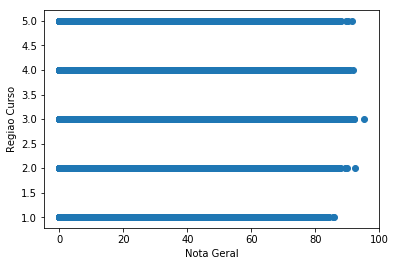

,count,mean,std,min,25%,50%,75%,max
co_regiao_habil,,,,,,,,
1,26734.0,28.191277,19.714673,0.0,8.625000,30.900000,42.099998,85.699997
2,87887.0,30.380577,20.503605,0.0,16.000000,32.900002,44.900002,92.300003
3,219933.0,32.259402,19.726957,0.0,21.600000,34.000000,45.599998,95.099998
4,83471.0,34.359156,19.000498,0.0,24.700001,35.900002,47.000000,91.800003
5,43007.0,31.524194,18.894230,0.0,21.600000,33.500000,44.000000,91.400002


In [38]:
# Verificar os resultados a partir da região do país
"""
1 Norte
2 Nordeste
3 Sudeste
4 Sul
5 Centro-Oeste
"""
#escola = tabela['QE_I17'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
#print(escola)
#tabela['CO_REGIAO_CURSO'] = tabela['CO_REGIAO_CURSO'].map({1 : 'N', 2 : 'NE', 3 : 'SE', 4 : 'S', 5 : 'CO'})
tabela=tabela.loc[(tabela['co_regiao_habil'].notnull())]
plt.scatter( tabela.nt_ger, tabela.co_regiao_habil )
plt.xlabel('Nota Geral')
plt.ylabel('Regiao Curso')
plt.show()
#nota geral agrupada pela questão 05
tabela['nt_ger'].groupby(tabela['co_regiao_habil']).describe()



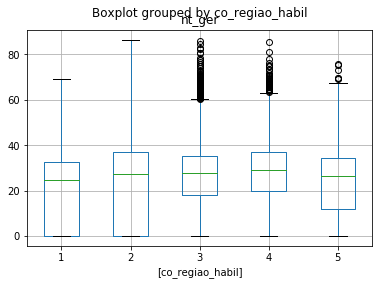

In [39]:
#Como verificar se a média dos alunos do campo QE_I05 para todos os alunos são realmente diferentes
qe05 = pandas.DataFrame(ccomp, columns=['nt_ger', 'co_regiao_habil'])
qe05.boxplot(by='co_regiao_habil')

In [ ]:
#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'N']))

#print(stats.shapiro(qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO == 'S']))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='S'].hist(label="Sul")
#qe05.NT_GER.loc[qe05.CO_REGIAO_CURSO =='N'].hist(label="Norte")
#plt.xlabel("Notas")
#plt.ylabel("Quantidade de Alunos")
#plt.legend()

In [41]:
ccomp['nt_ger'].groupby(ccomp['co_regiao_habil']).describe()

,count,mean,std,min,25%,50%,75%,max
co_regiao_habil,,,,,,,,
1,780.0,21.531410,16.041636,0.0,0.000000,24.750000,32.799999,69.000000
2,2778.0,24.681929,18.050076,0.0,0.000000,27.400000,37.200001,86.500000
3,9669.0,25.380215,15.514078,0.0,18.100000,27.799999,35.099998,85.800003
4,3335.0,27.207226,16.216960,0.0,19.799999,29.299999,37.049999,85.599998
5,1834.0,23.611941,15.980863,0.0,12.125000,26.299999,34.299999,75.699997
